In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import sqlalchemy
import utils

In [2]:
# Read the environment variables
%load_ext dotenv
%dotenv ../.env

In [3]:
# Pandas settings
pd.set_option("display.max_colwidth", None)

In [4]:
# Connect to the database
host = os.environ["LOCAL_HOST"]
port = os.environ["LOCAL_PORT"]
dbname = os.environ["POSTGRES_DB"]
dbuser = os.environ["POSTGRES_USER"]
dbpassword = os.environ["POSTGRES_PASSWORD"]

conn_string = f"postgresql://{dbuser}:{dbpassword}@{host}:{port}/{dbname}"
engine = sqlalchemy.create_engine(conn_string)

In [5]:
sql = """
SELECT * 
  FROM information_schema.tables
 WHERE table_schema = 'marts'
"""
result = pd.read_sql(sql, engine)
result

,table_catalog,table_schema,table_name,table_type,self_referencing_column_name,reference_generation,user_defined_type_catalog,user_defined_type_schema,user_defined_type_name,is_insertable_into,is_typed,commit_action
0,db2,marts,interactions,BASE TABLE,None,None,None,None,None,YES,NO,None
1,db2,marts,account_interactions_encoded,BASE TABLE,None,None,None,None,None,YES,NO,None
2,db2,marts,product_holdings,BASE TABLE,None,None,None,None,None,YES,NO,None
3,db2,marts,account_states,BASE TABLE,None,None,None,None,None,YES,NO,None
4,db2,marts,account_churn,BASE TABLE,None,None,None,None,None,YES,NO,None
5,db2,marts,account_product_holdings,BASE TABLE,None,None,None,None,None,YES,NO,None
6,db2,marts,account_info,BASE TABLE,None,None,None,None,None,YES,NO,None
7,db2,marts,dim_dates,BASE TABLE,None,None,None,None,None,YES,NO,None
8,db2,marts,account_interactions,BASE TABLE,None,None,None,None,None,YES,NO,None


In [6]:
sql = """
SELECT *
  FROM marts.account_info
"""
result = pd.read_sql(sql, engine)
result.head()

,account_id,language,gender,birthday,zip_code,payment_method,age
0,1000,EN,F,2000-02-25,5005,LSV,24
1,1001,IT,F,1964-05-17,9102,Kreditkarte,59
2,1002,DE,F,1964-05-13,3005,LSV,59
3,1003,None,F,1976-02-01,9102,Kreditkarte,48
4,1004,DE,M,1968-01-13,4003,Kreditkarte,56


In [7]:
table_schema = "marts"
table_name = "account_info"

output = utils.table_summary(table_schema, table_name, engine)
output

,column_name,data_type,total_count,unique_count,is_unique,min_value,max_value,true_count,false_count,null_count,empty_count,unique_values
0,account_id,character varying,8931,8931,True,1000,9999,None,None,0,0,None
1,language,text,8931,4,False,DE,IT,None,None,1522,0,"[DE, EN, FR, IT, None]"
2,gender,text,8931,3,False,D,M,None,None,0,0,"[D, F, M]"
3,birthday,date,8931,6115,False,1903-09-22,2020-01-30,None,None,0,0,None
4,zip_code,character varying,8931,9,False,1006,9102,None,None,0,0,"[1006, 2006, 3005, 4003, 5005, 6006, 7001, 8006, 9102]"
5,payment_method,text,8931,3,False,Kreditkarte,Rechnung,None,None,0,0,"[Kreditkarte, LSV, Rechnung]"
6,age,integer,8931,90,False,4,120,None,None,0,0,None


In [8]:
sql = """
SELECT *
  FROM marts.product_holdings
"""
result = pd.read_sql(sql, engine)
result.head()

,account_id,subscription_id,product_family,product_name,product_price,valid_from,valid_to
0,6078,14054,Internet,100,19.00,2022-09-05,9999-12-31
1,2245,12984,Internet,100,19.00,2023-08-14,9999-12-31
2,1131,17193,Internet,500,21.75,2021-01-14,9999-12-31
3,8944,39145,Fixline,CH Flat,10.00,2022-04-08,2022-10-18
4,1346,35860,Fixline,CH Flat,10.00,2022-05-18,2022-10-05


In [9]:
table_schema = "marts"
table_name = "product_holdings"

output = utils.table_summary(table_schema, table_name, engine)
output

,column_name,data_type,total_count,unique_count,is_unique,min_value,max_value,true_count,false_count,null_count,empty_count,unique_values
0,account_id,character varying,24019,8938,False,1000,9999,None,None,0,0,None
1,subscription_id,character varying,24019,24019,True,10001,49996,None,None,0,0,None
2,product_family,text,24019,4,False,Fixline,TV,None,None,0,0,"[Fixline, Internet, Mobile, TV]"
3,product_name,text,24019,12,False,100,Unlimited,None,None,0,0,"[100, 1000, 500, Basic, CH Flat, Europe Flat, L, M, Metered, Plus, S, Unlimited]"
4,product_price,numeric,24019,25,False,0.0,49.0,None,None,0,0,None
5,valid_from,date,24019,1000,False,2021-01-01,2023-09-27,None,None,0,0,None
6,valid_to,date,24019,803,False,2021-03-18,9999-12-31,None,None,0,0,None


In [10]:
sql = """
SELECT *
  FROM marts.interactions
"""
result = pd.read_sql(sql, engine)
result.head()

,account_id,date,time_in_queue,handling_time_s,call_reason,customer_satisfaction_after_call
0,1000,2022-11-25,12,42,Billing,NaN
1,1000,2023-01-08,6,135,Technical,5.0
2,1001,2022-09-24,13,82,Billing,4.0
3,1002,2024-01-17,48,26,Billing,NaN
4,1002,2022-10-17,22,74,Product,NaN


In [11]:
table_schema = "marts"
table_name = "interactions"

output = utils.table_summary(table_schema, table_name, engine)
output

,column_name,data_type,total_count,unique_count,is_unique,min_value,max_value,true_count,false_count,null_count,empty_count,unique_values
0,account_id,character varying,12230,6580,False,1000,9999,None,None,0,0,None
1,date,date,12230,1123,False,2021-01-04,2024-02-26,None,None,0,0,None
2,time_in_queue,integer,12230,56,False,3,90,None,None,0,0,None
3,handling_time_s,integer,12230,107,False,11,186,None,None,0,0,None
4,call_reason,text,12230,4,False,Billing,Technical,None,None,257,0,"[Billing, Churn, Product, Technical, None]"
5,customer_satisfaction_after_call,double precision,12230,5,False,1.0,5.0,None,None,4877,0,"[1.0, 2.0, 3.0, 4.0, 5.0, None]"


Text(0, 0.5, 'count')

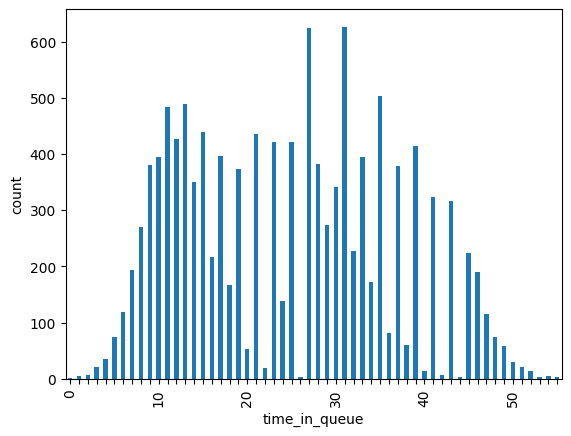

In [12]:
# Distribution of the time_in_queue values
sql = """
SELECT time_in_queue,
       count(*) as count
  FROM marts.interactions
 GROUP BY time_in_queue
 ORDER BY time_in_queue
"""
result = pd.read_sql(sql, engine)
ax = result["count"].plot.bar()
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 10) != 0:
        t.set_visible(False)
ax.set_xlabel("time_in_queue")
ax.set_ylabel("count")

Text(0, 0.5, 'count')

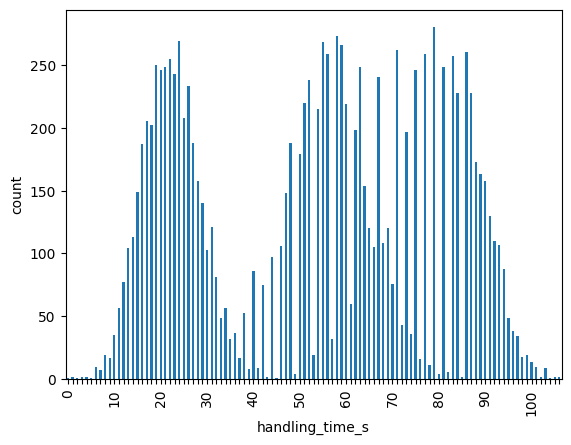

In [13]:
# Distribution of the handling_time_s values
sql = """
SELECT handling_time_s,
       count(*) as count
  FROM marts.interactions
 GROUP BY handling_time_s
 ORDER BY handling_time_s
"""
result = pd.read_sql(sql, engine)
ax = result["count"].plot.bar()
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 10) != 0:
        t.set_visible(False)
ax.set_xlabel("handling_time_s")
ax.set_ylabel("count")

In [14]:
# Distribution of the call_reason values
sql = """
SELECT call_reason,
       count(*) as count
  FROM marts.interactions
 WHERE call_reason IS NOT NULL
 GROUP BY call_reason
 ORDER BY call_reason
"""
result = pd.read_sql(sql, engine)
result

,call_reason,count
0,Billing,4621
1,Churn,1325
2,Product,2420
3,Technical,3607


In [15]:
# Distribution of the customer_satisfaction_after_call values
sql = """
SELECT customer_satisfaction_after_call,
       count(*) as count
  FROM marts.interactions
 WHERE customer_satisfaction_after_call IS NOT NULL
 GROUP BY customer_satisfaction_after_call
 ORDER BY customer_satisfaction_after_call
"""
result = pd.read_sql(sql, engine)
result

,customer_satisfaction_after_call,count
0,1.0,655
1,2.0,1222
2,3.0,1208
3,4.0,1835
4,5.0,2433


In [16]:
# account_product_holdings
sql = """
SELECT *
  FROM marts.account_product_holdings
"""
result = pd.read_sql(sql, engine)
result.head()

,account_id,language,gender,birthday,zip_code,payment_method,age,subscription_id,product_family,product_name,product_price,valid_from,valid_to,tenure,is_churned,churned_date
0,1000,EN,F,2000-02-25,5005,LSV,24,25151,TV,S,3.75,2022-02-27,9999-12-31,729.0,False,None
1,1000,EN,F,2000-02-25,5005,LSV,24,19577,Internet,1000,39.00,2022-09-19,2023-01-31,134.0,True,2023-01-31
2,1000,EN,F,2000-02-25,5005,LSV,24,38853,Fixline,Metered,0.00,2023-04-16,9999-12-31,316.0,False,None
3,1001,IT,F,1964-05-17,9102,Kreditkarte,59,13345,Internet,100,19.00,2021-09-15,2023-04-11,573.0,True,2023-04-11
4,1002,DE,F,1964-05-13,3005,LSV,59,46316,Mobile,Unlimited,44.10,2021-11-25,9999-12-31,823.0,False,None


        month product_family product_name  number_of_accounts
0  2021-01-01        Fixline      CH Flat                   2
1  2021-01-01        Fixline      Metered                   4
2  2021-01-01       Internet          100                   4
3  2021-01-01       Internet         1000                   1
4  2021-01-01       Internet          500                   2


<Axes: title={'center': 'TV'}, xlabel='month'>

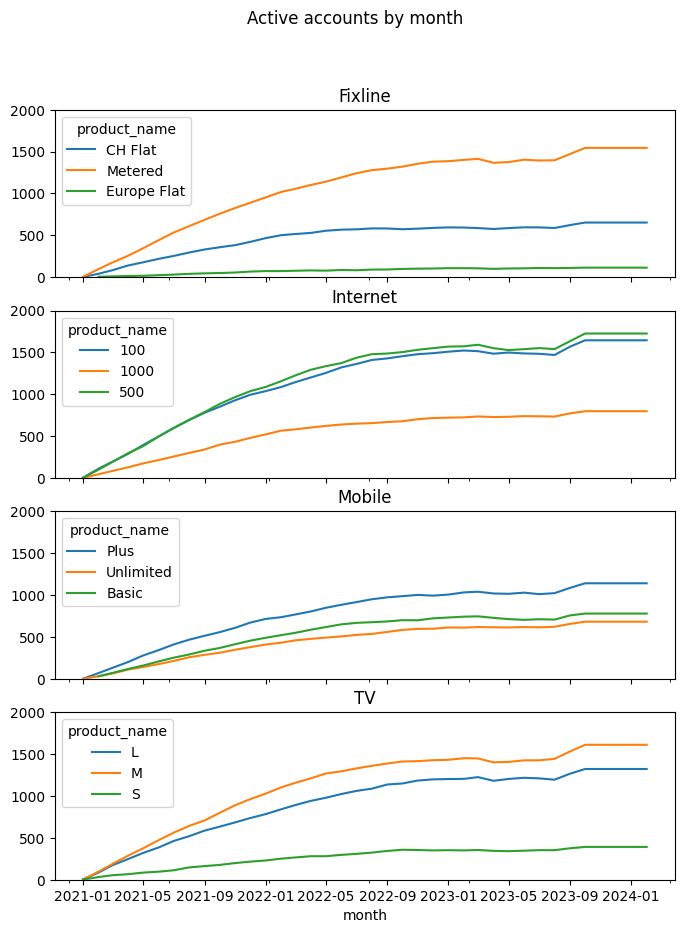

In [17]:
# Active accounts by month
sql = """
WITH months as (
    SELECT DISTINCT
           d.month_start_date
      FROM marts.dim_dates d
)
SELECT m.month_start_date as month,
       ph.product_family,
       ph.product_name,
       count(distinct ph.account_id) as number_of_accounts
  FROM months m
  JOIN marts.account_product_holdings ph
    ON m.month_start_date between ph.valid_from::date and ph.valid_to::date
 GROUP BY m.month_start_date,
       ph.product_family,
       ph.product_name
 ORDER BY m.month_start_date
"""
result = pd.read_sql(sql, engine)
print(result.head())
pivoted = result.pivot(index="month", columns=["product_family", "product_name"], values="number_of_accounts")
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 10), sharex=True, subplot_kw={'ylim': (0, 2000)})
fig.suptitle('Active accounts by month')
pivoted.Fixline.plot(ax=axes[0], title="Fixline")
pivoted.Internet.plot(ax=axes[1], title="Internet")
pivoted.Mobile.plot(ax=axes[2], title="Mobile")
pivoted.TV.plot(ax=axes[3], title="TV")

<Axes: title={'center': 'TV'}, xlabel='month'>

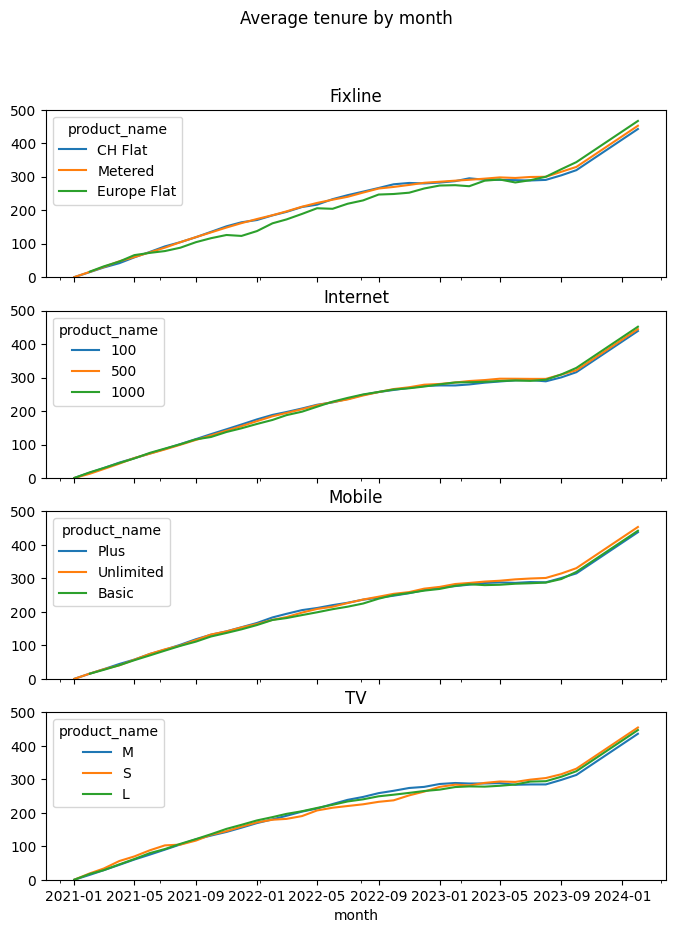

In [18]:
# Average tenure by month
sql = """
WITH months as (
    SELECT DISTINCT
           d.month_start_date
      FROM marts.dim_dates d
)
SELECT m.month_start_date as month,
       ph.product_family,
       ph.product_name,
       avg(m.month_start_date - ph.valid_from) as avg_tenure
  FROM months m
  JOIN marts.account_product_holdings ph
    ON m.month_start_date between ph.valid_from::date and ph.valid_to::date
 GROUP BY m.month_start_date,
       ph.product_family,
       ph.product_name
 ORDER BY m.month_start_date
"""
result = pd.read_sql(sql, engine)
pivoted = result.pivot(index="month", columns=["product_family", "product_name"], values="avg_tenure")
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 10), sharex=True, subplot_kw={'ylim': (0, 500)})
fig.suptitle('Average tenure by month')
pivoted.Fixline.plot(ax=axes[0], title="Fixline")
pivoted.Internet.plot(ax=axes[1], title="Internet")
pivoted.Mobile.plot(ax=axes[2], title="Mobile")
pivoted.TV.plot(ax=axes[3], title="TV")

<Axes: title={'center': 'TV'}, xlabel='month'>

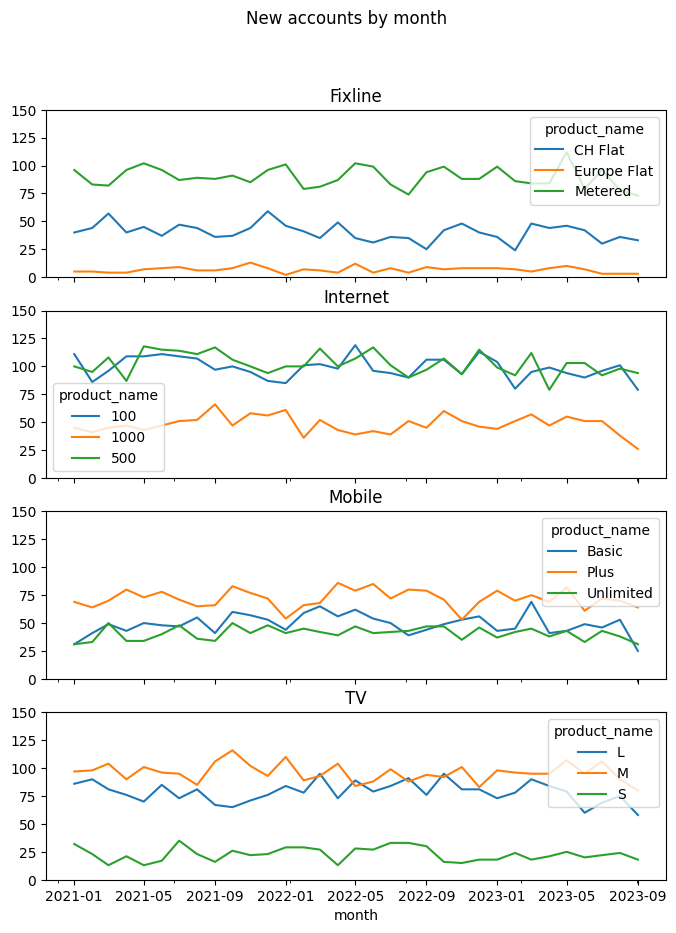

In [19]:
# New accounts by month
sql = """
WITH months as (
    SELECT DISTINCT
           d.month_start_date
      FROM marts.dim_dates d
)
SELECT m.month_start_date as month,
       ph.product_family,
       ph.product_name,
       count(distinct ph.account_id) as number_of_new_accounts
  FROM months m
  JOIN marts.account_product_holdings ph
    ON ph.valid_from::date between m.month_start_date and m.month_start_date + interval '1 month'
 GROUP BY m.month_start_date,
       ph.product_family,
       ph.product_name
 ORDER BY m.month_start_date
"""
result = pd.read_sql(sql, engine)
pivoted = result.pivot(index="month", columns=["product_family", "product_name"], values="number_of_new_accounts")
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 10), sharex=True, subplot_kw={'ylim': (0, 150)})
fig.suptitle('New accounts by month')
pivoted.Fixline.plot(ax=axes[0], title="Fixline")
pivoted.Internet.plot(ax=axes[1], title="Internet")
pivoted.Mobile.plot(ax=axes[2], title="Mobile")
pivoted.TV.plot(ax=axes[3], title="TV")

<Axes: title={'center': 'TV'}, xlabel='month'>

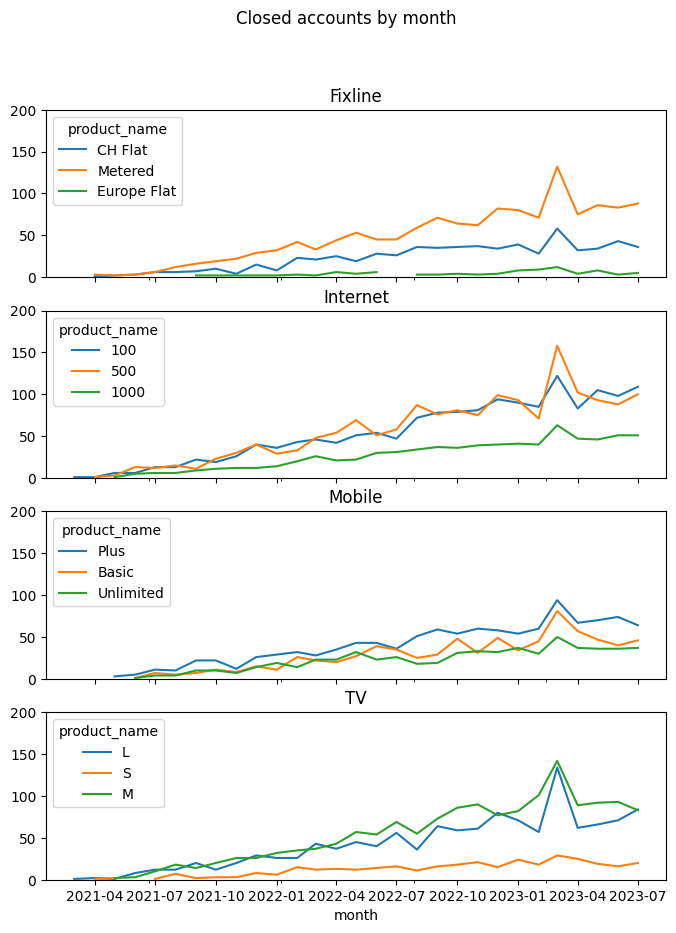

In [20]:
# Closed accounts by month
sql = """
WITH months as (
    SELECT DISTINCT
           d.month_start_date
      FROM marts.dim_dates d
)
SELECT m.month_start_date as month,
       ph.product_family,
       ph.product_name,
       count(distinct ph.account_id) as number_of_closed_accounts
  FROM months m
  JOIN marts.account_product_holdings ph
    ON ph.valid_to::date between m.month_start_date and m.month_start_date + interval '1 month'
 GROUP BY m.month_start_date,
       ph.product_family,
       ph.product_name
 ORDER BY m.month_start_date
"""
result = pd.read_sql(sql, engine)
pivoted = result.pivot(index="month", columns=["product_family", "product_name"], values="number_of_closed_accounts")
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 10), sharex=True, subplot_kw={'ylim': (0, 200)})
fig.suptitle('Closed accounts by month')
pivoted.Fixline.plot(ax=axes[0], title="Fixline")
pivoted.Internet.plot(ax=axes[1], title="Internet")
pivoted.Mobile.plot(ax=axes[2], title="Mobile")
pivoted.TV.plot(ax=axes[3], title="TV")